In [138]:
#importing libaries
import pandas as pd
import seaborn as sns
import numpy as np
#for displaying plots
from matplotlib import pyplot as plt
%matplotlib inline 

#for ignoring errors in distplot
import warnings
warnings.filterwarnings("ignore")

In [139]:
#importing data
df_consumer_price_indicator = pd.read_csv("data_prep/consumer_prices_indicators.csv")
df_crops_prod_indicator = pd.read_csv("data_prep/crops_production_indicators.csv")
df_emission = pd.read_csv("data_prep/emissions.csv")
df_exchange_rate = pd.read_csv("data_prep/exchange_rate.csv")
df_fertilizers_use = pd.read_csv("data_prep/fertilizers_use.csv")
df_food_balance_ind = pd.read_csv("data_prep/food_balances_indicators.csv")
df_food_security_indicators = pd.read_csv("data_prep/food_security_indicators.csv")
df_food_trade_indicators = pd.read_csv("data_prep/food_trade_indicators.csv")
df_foreign_invest = pd.read_csv("data_prep/foreign_direct_investment.csv")
df_land_temp = pd.read_csv("data_prep/land_temperature_change.csv")
df_land_use = pd.read_csv("data_prep/land_use.csv")
df_pest_use = pd.read_csv("data_prep/pesticides_use.csv")

# 1. Data Preprocessing

In [140]:
#preparing df_consumer_price_indicator data
selected_columns = ['Area Code (M49)', 'Area', 'Year','Domain', 'Item', 'Value']

# Filtering out rows where Item is 'Food price inflation'
filtered_df = df_consumer_price_indicator[selected_columns][df_consumer_price_indicator['Item'] == 'Food price inflation']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df = filtered_df.groupby(['Area Code (M49)','Area', 'Year', 'Domain', 'Item'])['Value'].sum().reset_index()

In [141]:
filtered_consumer_price_indicator = filtered_df.copy()

In [142]:
filtered_consumer_price_indicator.rename(columns={'Value' : 'food_price_inflation'}, inplace = True)

In [143]:
filtered_consumer_price_indicator.head()

,Area Code (M49),Area,Year,Domain,Item,food_price_inflation
0,4,Afghanistan,2001,Consumer Price Indices,Food price inflation,153.368307
1,4,Afghanistan,2002,Consumer Price Indices,Food price inflation,219.054193
2,4,Afghanistan,2003,Consumer Price Indices,Food price inflation,169.226933
3,4,Afghanistan,2004,Consumer Price Indices,Food price inflation,168.866060
4,4,Afghanistan,2005,Consumer Price Indices,Food price inflation,151.274875


In [144]:
columns_to_drop = ['Domain', 'Item']
filtered_consumer_price_indicator

,Area Code (M49),Area,Year,Domain,Item,food_price_inflation
0,4,Afghanistan,2001,Consumer Price Indices,Food price inflation,153.368307
1,4,Afghanistan,2002,Consumer Price Indices,Food price inflation,219.054193
2,4,Afghanistan,2003,Consumer Price Indices,Food price inflation,169.226933
3,4,Afghanistan,2004,Consumer Price Indices,Food price inflation,168.866060
4,4,Afghanistan,2005,Consumer Price Indices,Food price inflation,151.274875
...,...,...,...,...,...,...
4648,894,Zambia,2019,Consumer Price Indices,Food price inflation,124.840069
4649,894,Zambia,2020,Consumer Price Indices,Food price inflation,194.578015
4650,894,Zambia,2021,Consumer Price Indices,Food price inflation,333.381690
4651,894,Zambia,2022,Consumer Price Indices,Food price inflation,158.242893


In [145]:
filtered_consumer_price_indicator = filtered_consumer_price_indicator[['Area','Area Code (M49)','Year','food_price_inflation']]

In [146]:
filtered_consumer_price_indicator.head()

,Area,Area Code (M49),Year,food_price_inflation
0,Afghanistan,4,2001,153.368307
1,Afghanistan,4,2002,219.054193
2,Afghanistan,4,2003,169.226933
3,Afghanistan,4,2004,168.866060
4,Afghanistan,4,2005,151.274875


## Crops production indicators

In [147]:
df_crops_prod_indicator.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [148]:
#preparing df_crop_prod data
selected_columns = ['Area', 'Area Code (M49)', 'Year', 'Value', 'Element']

# Filtering out rows where Flag Description is 'Official figure'
filtered_df_ = df_crops_prod_indicator[selected_columns][df_crops_prod_indicator['Flag Description'] == 'Official figure']

# Resetting index
filtered_df_.reset_index(drop=True, inplace=True)

filtered_df_ = filtered_df_.groupby(['Area','Area Code (M49)','Year','Element' ])['Value'].sum().reset_index()

In [149]:
filtered_df_.head()

,Area,Area Code (M49),Year,Element,Value
0,Afghanistan,4,2000,Yield,192298
1,Afghanistan,4,2001,Yield,194114
2,Afghanistan,4,2002,Yield,199354
3,Afghanistan,4,2003,Yield,208287
4,Afghanistan,4,2004,Yield,365228


In [150]:
filtered_df_.drop(columns=['Element'], inplace=True)


In [151]:
filtered_crops_prod_indicator = filtered_df_.copy()

In [152]:
filtered_crops_prod_indicator.rename(columns={'Value' : 'yield'}, inplace = True)

In [153]:
filtered_crops_prod_indicator.head()

,Area,Area Code (M49),Year,yield
0,Afghanistan,4,2000,192298
1,Afghanistan,4,2001,194114
2,Afghanistan,4,2002,199354
3,Afghanistan,4,2003,208287
4,Afghanistan,4,2004,365228


## Emission data


In [154]:
df_emission.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,0.7056,E,Estimated value,NaN
1,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,20.8471,E,Estimated value,NaN
2,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,0.7054,E,Estimated value,NaN
3,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,19.2605,E,Estimated value,NaN
4,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2002,2002,3050,FAO TIER 1,kt,1.0656,E,Estimated value,NaN


In [155]:
df_emission['Element'].unique()

array(['Crops total (Emissions N2O)', 'Crops total (Emissions CH4)',
       'Emissions (N2O)', 'Emissions (CO2)'], dtype=object)

In [156]:
selected_columns = ['Area', 'Area Code (M49)', 'Year','Element','Value']

# Filtering out rows where Element is 'Emissions (CO2)'
filtered_df3 = df_emission[selected_columns][df_emission['Element'] == 'Emissions (CO2)']
filtered_df3.reset_index(drop=True, inplace=True)
filtered_emission = filtered_df3.groupby(['Area', 'Area Code (M49)', 'Year', 'Element'])['Value'].sum().reset_index()

In [157]:
filtered_emission.rename(columns={'Value' : 'CO2'}, inplace = True)

In [158]:
filtered_emission.drop(columns=['Element'], inplace=True)

In [159]:
filtered_emission.head()

,Area,Area Code (M49),Year,CO2
0,Afghanistan,4,2000,0.0
1,Afghanistan,4,2001,0.0
2,Afghanistan,4,2002,0.0
3,Afghanistan,4,2003,0.0
4,Afghanistan,4,2004,0.0


## Exchange Rate


In [160]:
selected_columns = ['Area', 'Area Code (M49)', 'Year','Value']
filtered_exchange_rate = df_exchange_rate.groupby(['Area', 'Area Code (M49)', 'Year'])['Value'].mean().reset_index()

In [161]:
filtered_exchange_rate.rename(columns={'Value' : 'exchange_rate'}, inplace = True)

In [162]:
filtered_exchange_rate.head()

,Area,Area Code (M49),Year,exchange_rate
0,Afghanistan,4,1980,44.129167
1,Afghanistan,4,1981,49.479902
2,Afghanistan,4,1982,50.599608
3,Afghanistan,4,1983,50.599608
4,Afghanistan,4,1984,50.599606


## Fertilizers Use


In [163]:
df_fertilizers_use.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [164]:
#preparing df_consumer_price_indicator data
selected_columns = ['Area', 'Area Code (M49)', 'Year', 'Value']

# Filtering out rows where Flag Description is Official figure
filtered_df5 = df_fertilizers_use[selected_columns][df_fertilizers_use['Flag Description'] == 'Official figure']

# Resetting index
filtered_df5.reset_index(drop=True, inplace=True)

filtered_df5 = filtered_df5.groupby(['Area', 'Area Code (M49)','Year'])['Value'].sum().reset_index()

In [165]:
filtered_df5.head()

,Area,Area Code (M49),Year,Value
0,Afghanistan,4,2018,519122.0
1,Albania,8,2002,119726.0
2,Albania,8,2003,119903.0
3,Albania,8,2004,129231.0
4,Albania,8,2005,133330.0


In [166]:
filtered_fertilizer = filtered_df5.copy()
filtered_fertilizer.rename(columns={'Value' : 'fertilizer_used'}, inplace = True)

In [167]:
filtered_fertilizer.head()

,Area,Area Code (M49),Year,fertilizer_used
0,Afghanistan,4,2018,519122.0
1,Albania,8,2002,119726.0
2,Albania,8,2003,119903.0
3,Albania,8,2004,129231.0
4,Albania,8,2005,133330.0


## Food Balance Indicator


In [168]:
df_food_balance_ind.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [169]:
df_food_balance_ind['Item'].unique()

array(['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
       'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
       'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
       'Stimulants', 'Spices', 'Alcoholic Beverages', 'Meat', 'Eggs',
       'Milk - Excluding Butter', 'Fish, Seafood'], dtype=object)

In [170]:
selected_columns = ['Area Code (M49)', 'Area', 'Year', 'Value','Item']

items_to_exclude = ['Meat', 'Eggs', 'Milk - Excluding Butter', 'Fish, Seafood', 'Alcoholic Beverages']


# Filtering out rows where Item is 'Food price inflation'
filtered_df7_ = df_food_balance_ind[selected_columns][(df_food_balance_ind['Element'] == 'Export Quantity') & 
                                                      (~df_food_balance_ind['Item'].isin(items_to_exclude))]
# Resetting index
filtered_df7_.reset_index(drop=True, inplace=True)

filtered_df7_ = filtered_df7_.groupby(['Area Code (M49)','Area','Year'])['Value'].sum().reset_index()

In [171]:
filtered_df7_.rename(columns={'Value' : 'food_balance_indicator'}, inplace = True)

In [172]:
filtered_food_balance_ind = filtered_df7_.copy()

In [173]:
filtered_food_balance_ind.head()

,Area Code (M49),Area,Year,food_balance_indicator
0,4,Afghanistan,2010,360.0
1,4,Afghanistan,2011,277.0
2,4,Afghanistan,2012,198.0
3,4,Afghanistan,2013,281.0
4,4,Afghanistan,2014,412.0


## Food Security Indicator


In [174]:
df_food_security_indicators.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


In [175]:
df_food_security_indicators['Item'].unique()

array(['Average dietary energy supply adequacy (percent) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of low birthweight (percent)'], dtype=object)

In [176]:
#preparing df_consumer_price_indicator data
selected_columns = ['Area','Area Code (M49)', 'Year', 'Item','Value']

# Filtering out rows where Item is in the list of items
filtered_df8 = df_food_security_indicators[selected_columns][df_food_security_indicators['Item Code'].isin(['21030','21031'])]
                                                                                                                          
# Resetting index
filtered_df8.reset_index(drop=True, inplace=True)

filtered_df8 = filtered_df8.groupby(['Area','Area Code (M49)','Year', 'Item'])['Value'].sum().reset_index()

In [177]:
filtered_df8.head()

,Area,Area Code (M49),Year,Item,Value
0,Afghanistan,4,2000,Per capita food supply variability (kcal/cap/day),58.0
1,Afghanistan,4,2001,Per capita food production variability (consta...,16.3
2,Afghanistan,4,2001,Per capita food supply variability (kcal/cap/day),47.0
3,Afghanistan,4,2002,Per capita food production variability (consta...,21.0
4,Afghanistan,4,2002,Per capita food supply variability (kcal/cap/day),71.0


In [178]:
# Creating the pivot table
pivot_table = pd.pivot_table(filtered_df8, index=['Area','Area Code (M49)', 'Year'], columns='Item', values='Value')

# Resetting index
pivot_table.reset_index(inplace=True)

# Renaming columns
pivot_table.columns.name = None  # Remove the name of the 'Item' column
pivot_table.rename(columns={
    'Per capita food supply variability (kcal/cap/day)': 'food_supply(per capita)',
    'Per capita food production variability (constant 2014-2016 thousand int$ per capita)': 'food_production(per_capita)'
}, inplace=True)

In [179]:
filtered_food_security = pivot_table.copy()

In [180]:
filtered_food_security = pivot_table[['Area', 'Area Code (M49)', 'Year', 'food_production(per_capita)', 'food_supply(per capita)']]

In [181]:
filtered_food_security.head()

,Area,Area Code (M49),Year,food_production(per_capita),food_supply(per capita)
0,Afghanistan,4,2000,NaN,58.0
1,Afghanistan,4,2001,16.3,47.0
2,Afghanistan,4,2002,21.0,71.0
3,Afghanistan,4,2003,20.8,72.0
4,Afghanistan,4,2004,17.3,50.0


## Food Trade Indicators


In [182]:
df_food_trade_indicators.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [183]:
df_food_trade_indicators['Item'].unique()

array(['Cereals and Preparations', 'Fats and Oils (excluding Butter)',
       'Meat and Meat Preparations', 'Sugar and Honey',
       'Fruit and Vegetables', 'Dairy Products and Eggs',
       'Alcoholic Beverages', 'Non-alcoholic Beverages', 'Other food',
       'Non-food', 'Non-edible Fats and Oils', 'Tobacco'], dtype=object)

In [184]:
selected_columns = ['Area', 'Area Code (M49)', 'Year', 'Value']

items_to_exclude = [ 'Dairy Products and Eggs', 'Non-food', 'Other food', 'Alcoholic Beverages', 'Meat and Meat Preparations']

# Filtering out rows where Element is 'Export Value'
filtered_df9_ = df_food_trade_indicators[selected_columns][(df_food_trade_indicators['Element'] == 'Export Value') & 
                                                      (~df_food_trade_indicators['Item'].isin(items_to_exclude))]
# Resetting index
filtered_df9_.reset_index(drop=True, inplace=True)

filtered_df9_ = filtered_df9_.groupby(['Area', 'Area Code (M49)', 'Year'])['Value'].sum().reset_index()

In [185]:
filtered_food_trade_indicators = filtered_df9_.copy()

In [186]:
filtered_food_trade_indicators.rename(columns = {'Value': 'export_value'}, inplace = True)

In [187]:
filtered_food_trade_indicators.head()

,Area,Area Code (M49),Year,export_value
0,Afghanistan,4,1991,51858.0
1,Afghanistan,4,1992,19062.0
2,Afghanistan,4,1993,21324.0
3,Afghanistan,4,1994,26907.0
4,Afghanistan,4,1995,24240.0


## Foreign Invest


In [188]:
df_foreign_invest.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [189]:
df_foreign_invest['Item'].unique()

array(['Total FDI inflows', 'Total FDI outflows',
       'FDI inflows to Agriculture, Forestry and Fishing',
       'FDI inflows to Food, Beverages and Tobacco',
       'FDI outflows to Agriculture, Forestry and Fishing',
       'FDI outflows to Food, Beverages and Tobacco'], dtype=object)

In [190]:
#preparing df_consumer_price_indicator data
selected_columns = ['Area', 'Area Code (M49)','Year', 'Item','Value']
filtered_df10_ = df_foreign_invest[selected_columns][df_foreign_invest['Item'].isin(['Total FDI inflows','Total FDI outflows'])]
                                                                                                                         
# Resetting index
filtered_df10_.reset_index(drop=True, inplace=True)

filtered_df10_ = filtered_df10_.groupby(['Area','Area Code (M49)','Year', 'Item'])['Value'].sum().reset_index()

In [191]:
filtered_df10_.head()

,Area,Area Code (M49),Year,Item,Value
0,Afghanistan,4,2000,Total FDI inflows,0.17
1,Afghanistan,4,2001,Total FDI inflows,0.68
2,Afghanistan,4,2002,Total FDI inflows,50.00
3,Afghanistan,4,2003,Total FDI inflows,57.80
4,Afghanistan,4,2003,Total FDI outflows,1.00


In [192]:
# Creating the pivot table
pivot_table = pd.pivot_table(filtered_df10_, index=['Area', 'Area Code (M49)','Year'], columns='Item', values='Value')

# Resetting index
pivot_table.reset_index(inplace=True)

filtered_foreign_invest = pivot_table.copy()

# Renaming columns
pivot_table.columns.name = None 
# pivot_table.rename(columns={
#     'Total FDI inflows': 'FDI_inflows_total',
#     'Total FDI outflows': 'FDI_outflows_total'
# }, inplace=True)

In [193]:
filtered_foreign_invest.rename(columns={
    'Total FDI inflows': 'FDI_inflows_total',
    'Total FDI outflows': 'FDI_outflows_total'
}, inplace=True)

In [194]:
filtered_foreign_invest.head()

Item,Area,Area Code (M49),Year,FDI_inflows_total,FDI_outflows_total
0,Afghanistan,4,2000,0.17,NaN
1,Afghanistan,4,2001,0.68,NaN
2,Afghanistan,4,2002,50.00,NaN
3,Afghanistan,4,2003,57.80,1.0
4,Afghanistan,4,2004,186.90,-0.7


## Land Temperature


In [195]:
df_land_temp.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [196]:
selected_columns = ['Area', 'Area Code (M49)','Year','Value']

# Filtering out rows where Element is 'Temperature change'
filtered_df11 = df_land_temp[selected_columns][df_land_temp['Element'] == 'Temperature change']
filtered_df11.reset_index(drop=True, inplace=True)
filtered_temp = filtered_df11.groupby(['Area', 'Area Code (M49)','Year'])['Value'].sum().reset_index()

In [197]:
filtered_temp.rename(columns={'Value' : 'land_temp'}, inplace = True)

In [198]:
filtered_temp.head()

,Area,Area Code (M49),Year,land_temp
0,Afghanistan,4,2000,4.965
1,Afghanistan,4,2001,6.555
2,Afghanistan,4,2002,6.825
3,Afghanistan,4,2003,2.935
4,Afghanistan,4,2004,6.866


## Pesticides Use


In [199]:
df_pest_use.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [200]:
df_pest_use['Item'].unique()

array(['Pesticides (total)', 'Insecticides', 'Herbicides',
       'Fungicides and Bactericides', 'Fungicides – Seed treatments',
       'Insecticides – Seed Treatments', 'Rodenticides'], dtype=object)

In [201]:
selected_columns = ['Area Code (M49)', 'Area', 'Year', 'Value']

# Filtering out rows where Item is 'Pesticides (total)' and Unit is 'kg/ha'
filtered_df12 = df_pest_use[selected_columns][(df_pest_use['Item'] == 'Pesticides (total)') & 
                                                      (df_pest_use['Unit'].isin(['kg/ha']))]
# Resetting index
filtered_df12.reset_index(drop=True, inplace=True)

filtered_df12 = filtered_df12.groupby(['Area Code (M49)','Area','Year'])['Value'].mean().reset_index()

In [202]:
filtered_df12.head()

,Area Code (M49),Area,Year,Value
0,8,Albania,2000,0.44
1,8,Albania,2001,0.46
2,8,Albania,2002,0.47
3,8,Albania,2003,0.49
4,8,Albania,2004,0.51


In [203]:
filtered_pest_use = filtered_df12.copy()
filtered_pest_use.rename(columns={'Value' : 'pesticides'}, inplace = True)

In [204]:
filtered_pest_use.head()

,Area Code (M49),Area,Year,pesticides
0,8,Albania,2000,0.44
1,8,Albania,2001,0.46
2,8,Albania,2002,0.47
3,8,Albania,2003,0.49
4,8,Albania,2004,0.51


# land_use


In [205]:
df_land_use.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [206]:
selected_columns = ['Area', 'Area Code (M49)','Year', 'Value']

# Filtering out rows where Item is 'Cropland' and Flag Description is 'Official figure'
filtered_df13 = df_land_use[selected_columns][(df_land_use['Item'] == 'Cropland') & 
                                                      (df_land_use['Flag Description'].isin(['Official figure']))]
# Resetting index
filtered_df13.reset_index(drop=True, inplace=True)

filtered_df13 = filtered_df13.groupby(['Area', 'Area Code (M49)','Year'])['Value'].sum().reset_index()

In [207]:
filtered_land_use = filtered_df13.copy()
filtered_land_use.rename(columns={'Value' : 'land_used'}, inplace = True)

In [208]:
filtered_land_use.head()

,Area,Area Code (M49),Year,land_used
0,Afghanistan,4,1980,8049.0
1,Afghanistan,4,1981,8053.0
2,Afghanistan,4,1982,8054.0
3,Afghanistan,4,1983,8054.0
4,Afghanistan,4,1984,8054.0


In [209]:
## Merging Data
merged_table_test = pd.merge(filtered_crops_prod_indicator, filtered_consumer_price_indicator, on=['Area Code (M49)','Area','Year'], how='outer')
merged_table_test = pd.merge(merged_table_test, filtered_emission, on=['Area Code (M49)','Area','Year'], how='outer')
merged_table_test = pd.merge(merged_table_test, filtered_exchange_rate, on=['Area Code (M49)','Area','Year'], how='outer')
merged_table_test = pd.merge(merged_table_test, filtered_fertilizer, on=['Area Code (M49)','Area','Year'], how='outer')
merged_table_test = pd.merge(merged_table_test, filtered_food_balance_ind, on=['Area Code (M49)','Area','Year'], how='outer')
merged_table_test=pd.merge(merged_table_test, filtered_food_trade_indicators, on=['Area Code (M49)','Area','Year'], how='outer')
merged_table_test = pd.merge(merged_table_test, filtered_foreign_invest, on=['Area Code (M49)','Area','Year'], how='outer')
merged_table_test = pd.merge(merged_table_test, filtered_temp, on=['Area Code (M49)','Area','Year'], how='outer')
merged_table_test = pd.merge(merged_table_test, filtered_pest_use, on=['Area Code (M49)','Area','Year'], how='outer')
merged_table_test = pd.merge(merged_table_test, filtered_land_use, on=['Area Code (M49)','Area','Year'], how='outer')


In [210]:
filtered_food_security.head()

,Area,Area Code (M49),Year,food_production(per_capita),food_supply(per capita)
0,Afghanistan,4,2000,NaN,58.0
1,Afghanistan,4,2001,16.3,47.0
2,Afghanistan,4,2002,21.0,71.0
3,Afghanistan,4,2003,20.8,72.0
4,Afghanistan,4,2004,17.3,50.0


In [211]:
merged_table_test.dtypes

Area                       object
Area Code (M49)             int64
Year                        int64
yield                     float64
food_price_inflation      float64
CO2                       float64
exchange_rate             float64
fertilizer_used           float64
food_balance_indicator    float64
export_value              float64
FDI_inflows_total         float64
FDI_outflows_total        float64
land_temp                 float64
pesticides                float64
land_used                 float64
dtype: object

In [212]:
filtered_food_security['Area'] = filtered_food_security['Area'].astype('object')
filtered_food_security['Year'] = filtered_food_security['Year'].astype('int')

In [213]:
filtered_food_security.head()

,Area,Area Code (M49),Year,food_production(per_capita),food_supply(per capita)
0,Afghanistan,4,2000,NaN,58.0
1,Afghanistan,4,2001,16.3,47.0
2,Afghanistan,4,2002,21.0,71.0
3,Afghanistan,4,2003,20.8,72.0
4,Afghanistan,4,2004,17.3,50.0


In [214]:
filtered_food_security.dtypes

Area                            object
Area Code (M49)                  int64
Year                             int64
food_production(per_capita)    float64
food_supply(per capita)        float64
dtype: object

In [215]:
merged_table_test = pd.merge(merged_table_test, filtered_food_security, on=['Area Code (M49)','Area','Year'], how='outer')


In [216]:
merged_table_test.head()

,Area,Area Code (M49),Year,yield,food_price_inflation,CO2,exchange_rate,fertilizer_used,food_balance_indicator,export_value,FDI_inflows_total,FDI_outflows_total,land_temp,pesticides,land_used,food_production(per_capita),food_supply(per capita)
0,Afghanistan,4,2000,192298.0,NaN,0.0,47357.574730,NaN,NaN,31080.0,0.17,NaN,4.965,NaN,NaN,NaN,58.0
1,Afghanistan,4,2001,194114.0,153.368307,0.0,47500.014520,NaN,NaN,27110.0,0.68,NaN,6.555,NaN,NaN,16.3,47.0
2,Afghanistan,4,2002,199354.0,219.054193,0.0,3981.907750,NaN,NaN,31153.0,50.00,NaN,6.825,NaN,NaN,21.0,71.0
3,Afghanistan,4,2003,208287.0,169.226933,0.0,48.762754,NaN,NaN,47612.0,57.80,1.0,2.935,NaN,NaN,20.8,72.0
4,Afghanistan,4,2004,365228.0,168.866060,0.0,47.845313,NaN,NaN,48633.0,186.90,-0.7,6.866,NaN,NaN,17.3,50.0


In [217]:
merged_table_test.shape

(9761, 17)

In [218]:
#drop Duplicates
merged_table_test = merged_table_test.drop_duplicates()

In [219]:
merged_table_test.shape

(9761, 17)

In [220]:
merged_table_test.columns

Index(['Area', 'Area Code (M49)', 'Year', 'yield', 'food_price_inflation',
       'CO2', 'exchange_rate', 'fertilizer_used', 'food_balance_indicator',
       'export_value', 'FDI_inflows_total', 'FDI_outflows_total', 'land_temp',
       'pesticides', 'land_used', 'food_production(per_capita)',
       'food_supply(per capita)'],
      dtype='object')

## Data Wrangling

In [221]:
merged_table_test.head()

,Area,Area Code (M49),Year,yield,food_price_inflation,CO2,exchange_rate,fertilizer_used,food_balance_indicator,export_value,FDI_inflows_total,FDI_outflows_total,land_temp,pesticides,land_used,food_production(per_capita),food_supply(per capita)
0,Afghanistan,4,2000,192298.0,NaN,0.0,47357.574730,NaN,NaN,31080.0,0.17,NaN,4.965,NaN,NaN,NaN,58.0
1,Afghanistan,4,2001,194114.0,153.368307,0.0,47500.014520,NaN,NaN,27110.0,0.68,NaN,6.555,NaN,NaN,16.3,47.0
2,Afghanistan,4,2002,199354.0,219.054193,0.0,3981.907750,NaN,NaN,31153.0,50.00,NaN,6.825,NaN,NaN,21.0,71.0
3,Afghanistan,4,2003,208287.0,169.226933,0.0,48.762754,NaN,NaN,47612.0,57.80,1.0,2.935,NaN,NaN,20.8,72.0
4,Afghanistan,4,2004,365228.0,168.866060,0.0,47.845313,NaN,NaN,48633.0,186.90,-0.7,6.866,NaN,NaN,17.3,50.0


In [222]:
merged_table_test.shape

(9761, 17)

## Checking Null Values


In [223]:
# Checking Null Values
merged_table_test.isnull().sum()

Area                              0
Area Code (M49)                   0
Year                              0
yield                          6406
food_price_inflation           5108
CO2                            4631
exchange_rate                  1122
fertilizer_used                8853
food_balance_indicator         7585
export_value                   3636
FDI_inflows_total              5195
FDI_outflows_total             6182
land_temp                      4280
pesticides                     5686
land_used                      6750
food_production(per_capita)    5841
food_supply(per capita)        5985
dtype: int64

<AxesSubplot:>

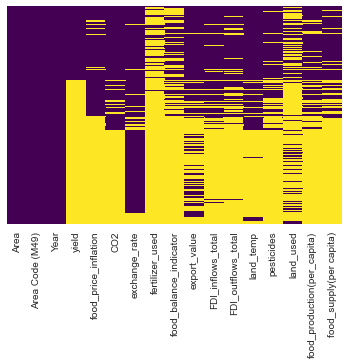

In [224]:
sns.heatmap(merged_table_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [225]:
merged_table_test.fillna(0, inplace = True)

In [226]:
merged_table_test.isnull().sum()

Area                           0
Area Code (M49)                0
Year                           0
yield                          0
food_price_inflation           0
CO2                            0
exchange_rate                  0
fertilizer_used                0
food_balance_indicator         0
export_value                   0
FDI_inflows_total              0
FDI_outflows_total             0
land_temp                      0
pesticides                     0
land_used                      0
food_production(per_capita)    0
food_supply(per capita)        0
dtype: int64

In [227]:
df_filtered2 = merged_table_test.copy()

In [228]:
df_filtered2.drop(columns='Area', inplace = True) # Droping Area column

In [229]:
df_filtered_outlier = df_filtered2.copy()

[]

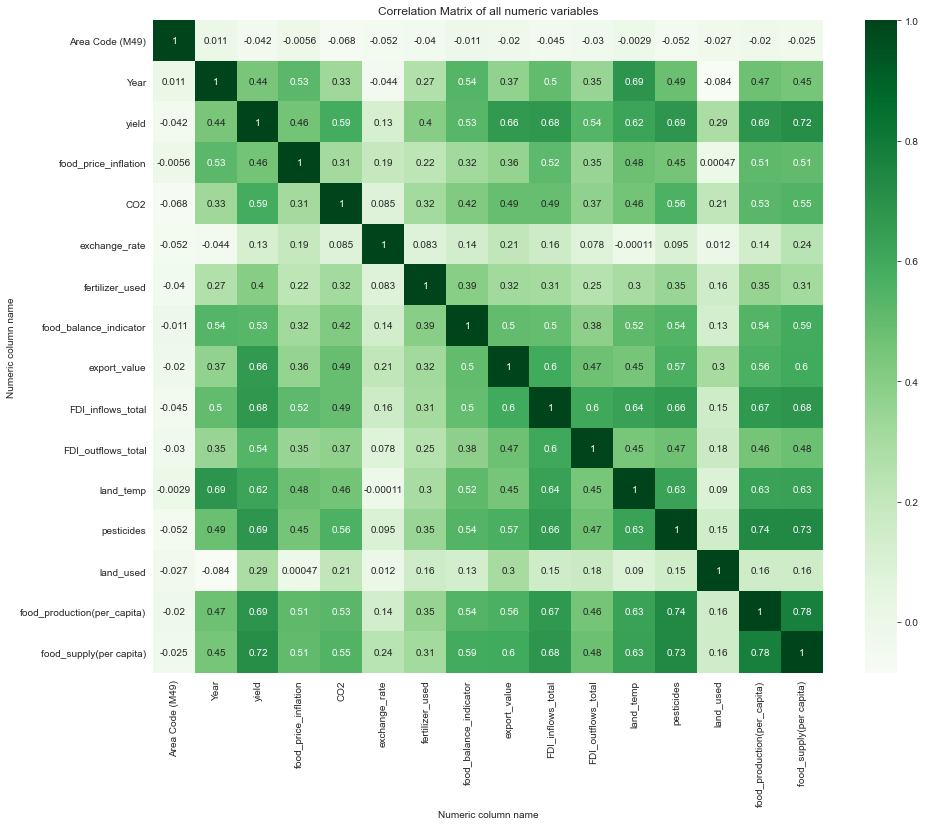

In [230]:
# creating correlationMatrix graph
correlationMatrix = df_filtered_outlier.corr(method='spearman')
plt.figure(figsize=(15,12))
plt.title('Correlation Matrix of all numeric variables')
sns.heatmap(correlationMatrix, cmap="Greens",annot=True)
plt.xlabel('Numeric column name')
plt.ylabel('Numeric column name')
plt.plot()

## Removing Outlier

No handles with labels found to put in legend.
No handles with labels found to put in legend.


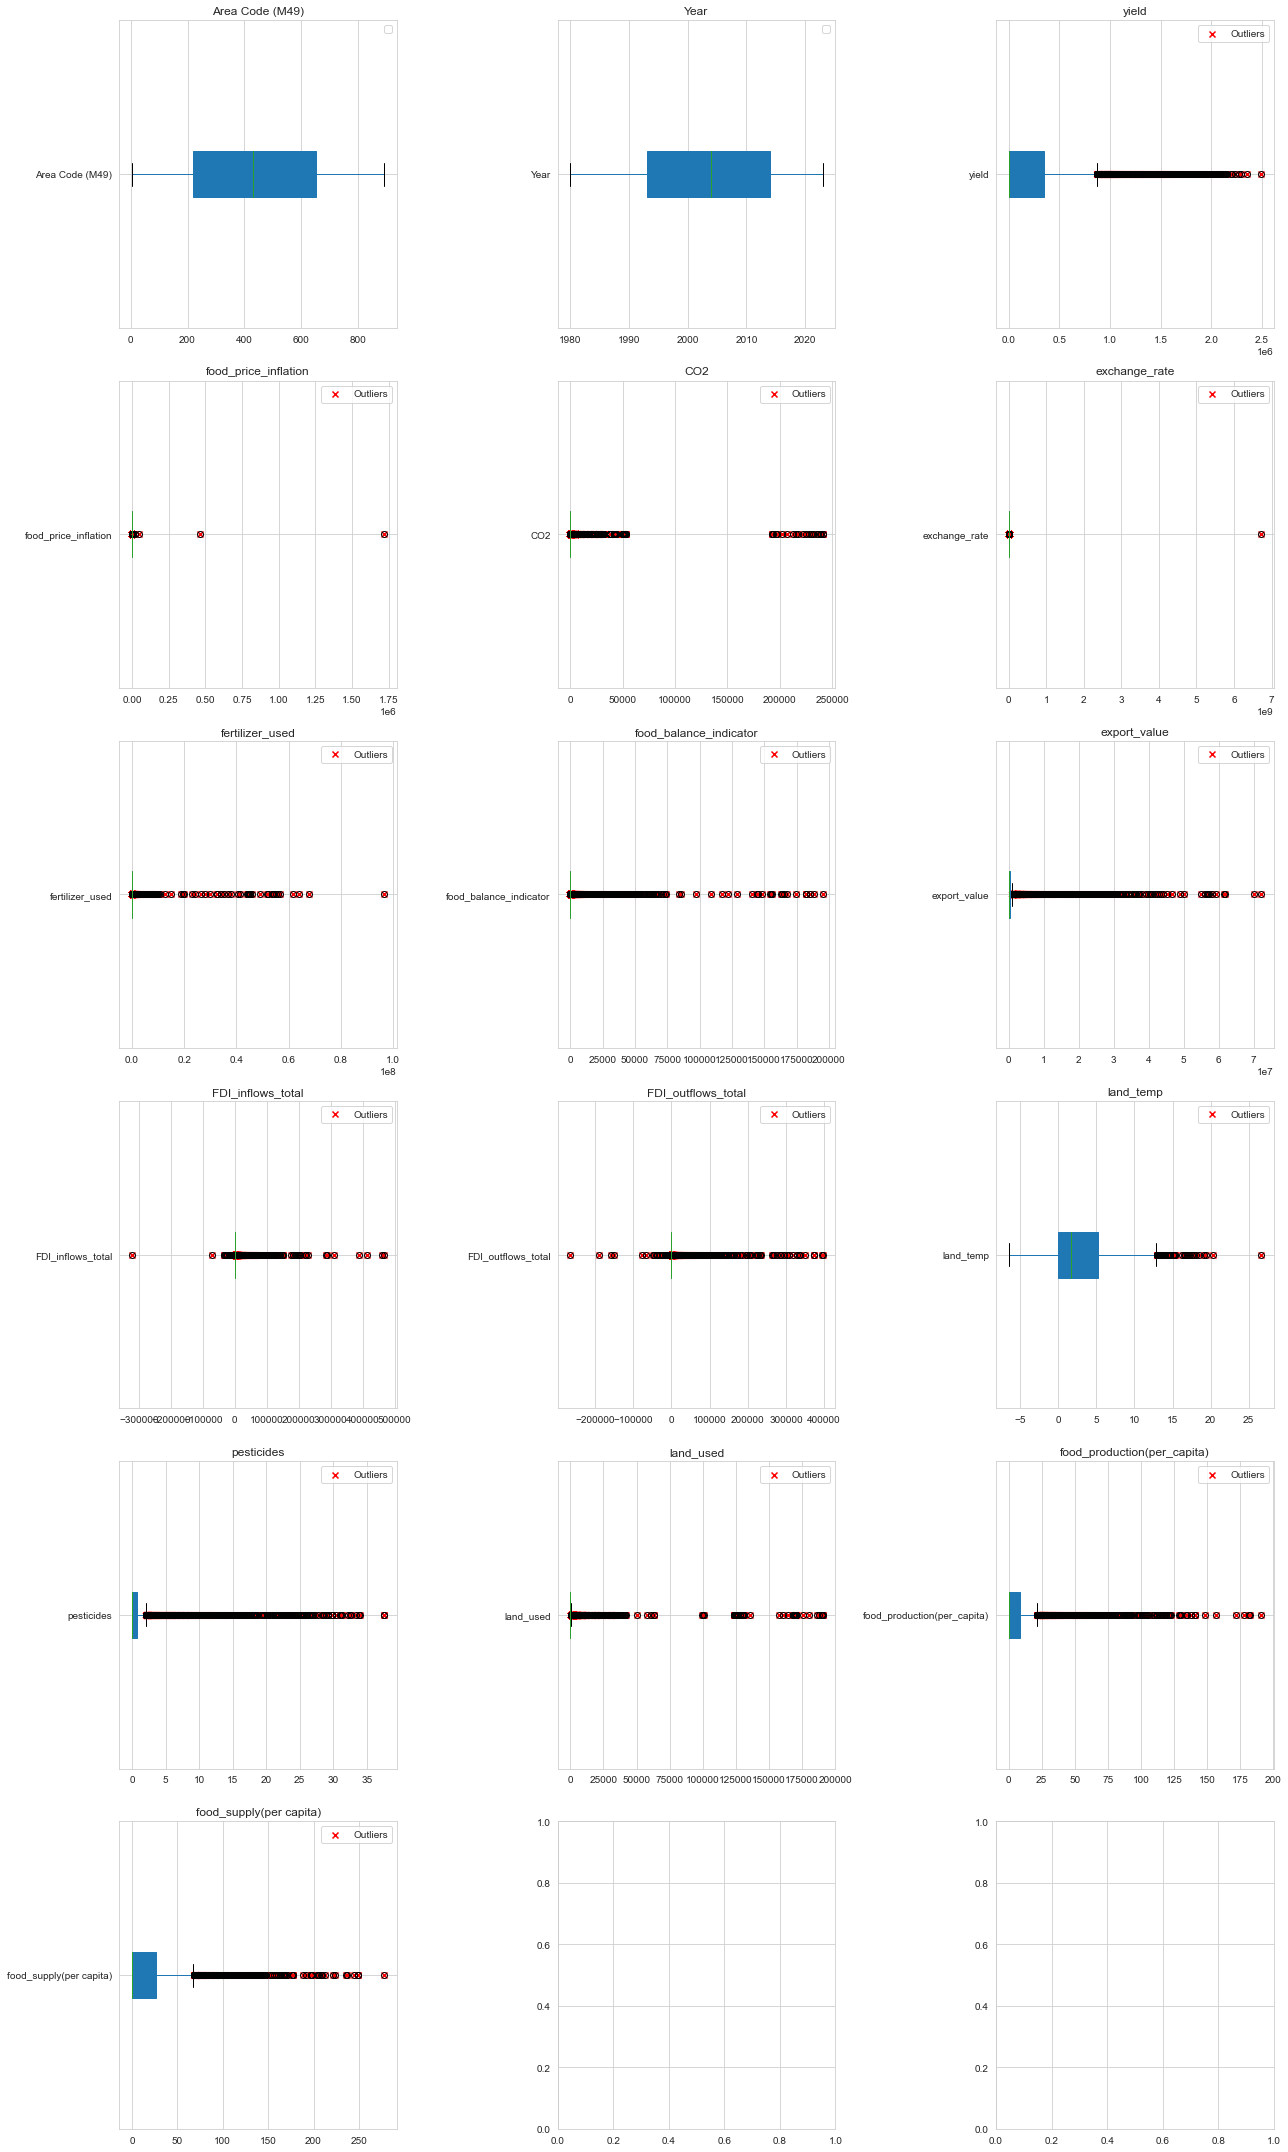

In [231]:
def plot_outliers(df):
    # Convert columns to numeric if possible
    df = df.apply(pd.to_numeric, errors='ignore')
    
    num_cols = 3
    num_rows = (len(df.columns) + num_cols - 1) // num_cols
    
    # Define figure and axes for plotting
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5*num_rows))
    axes = axes.flatten()
    
    # Iterate over each column in the DataFrame
    for i, col in enumerate(df.columns):
        # Convert the column to numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Create a box plot for the column
        df.boxplot(column=col, ax=axes[i], vert=False, patch_artist=True)
        
        # Calculating the IQR (Interquartile Range) for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Plot outliers
        if not outliers.empty:
            axes[i].scatter(outliers[col], [1] * len(outliers), color='red', label='Outliers', marker='x')
        
        axes[i].set_title(col)
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

# Plot outliers using box plots in the merged table
plot_outliers(df_filtered_outlier)


In [232]:
columns = df_filtered_outlier.columns
print(columns)

Index(['Area Code (M49)', 'Year', 'yield', 'food_price_inflation', 'CO2',
       'exchange_rate', 'fertilizer_used', 'food_balance_indicator',
       'export_value', 'FDI_inflows_total', 'FDI_outflows_total', 'land_temp',
       'pesticides', 'land_used', 'food_production(per_capita)',
       'food_supply(per capita)'],
      dtype='object')


In [233]:
merged_table_test.drop(columns = ['Area'], inplace = True)

In [234]:
merged_table_test.shape

(9761, 16)

In [235]:
import numpy as np

def out_zscore(data):
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean) / std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
#     print("Total number of outliers are", len(outliers))
    return outliers



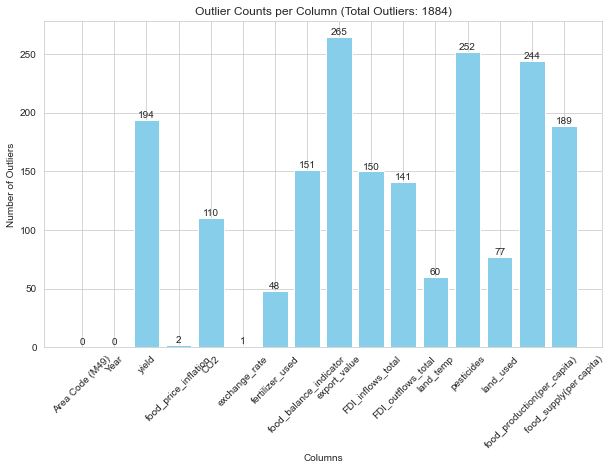

In [236]:

columns = merged_table_test.columns
outliers_dict = {}  # Dictionary to store outlier counts per column
total_outliers = 0  # Total number of outliers

for col in columns:
    outliers = out_zscore(df_filtered_outlier[col])
    outliers_dict[col] = len(outliers)  # Store the count of outliers for each column
    total_outliers += len(outliers)  # Update the total number of outliers

# Visualize outlier counts
plt.figure(figsize=(10, 6))
bars = plt.bar(outliers_dict.keys(), outliers_dict.values(), color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Outlier Counts per Column (Total Outliers: {})'.format(total_outliers))
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add text annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [237]:
columns = merged_table_test.columns
filtered_df = merged_table_test.copy()  # Make a copy to preserve the original DataFrame

for col in columns:
    outliers = out_zscore(df_filtered_outlier[col])
    filtered_df = filtered_df[~filtered_df[col].isin(outliers)] # new dataframe after outlier

print("Shape of DataFrame after removing outliers:", filtered_df.shape)

Shape of DataFrame after removing outliers: (8506, 16)


In [238]:
filtered_df.head()

,Area Code (M49),Year,yield,food_price_inflation,CO2,exchange_rate,fertilizer_used,food_balance_indicator,export_value,FDI_inflows_total,FDI_outflows_total,land_temp,pesticides,land_used,food_production(per_capita),food_supply(per capita)
0,4,2000,192298.0,0.000000,0.0,47357.574730,0.0,0.0,31080.0,0.17,0.0,4.965,0.0,0.0,0.0,58.0
1,4,2001,194114.0,153.368307,0.0,47500.014520,0.0,0.0,27110.0,0.68,0.0,6.555,0.0,0.0,16.3,47.0
2,4,2002,199354.0,219.054193,0.0,3981.907750,0.0,0.0,31153.0,50.00,0.0,6.825,0.0,0.0,21.0,71.0
3,4,2003,208287.0,169.226933,0.0,48.762754,0.0,0.0,47612.0,57.80,1.0,2.935,0.0,0.0,20.8,72.0
4,4,2004,365228.0,168.866060,0.0,47.845313,0.0,0.0,48633.0,186.90,-0.7,6.866,0.0,0.0,17.3,50.0


## Data Distribution 

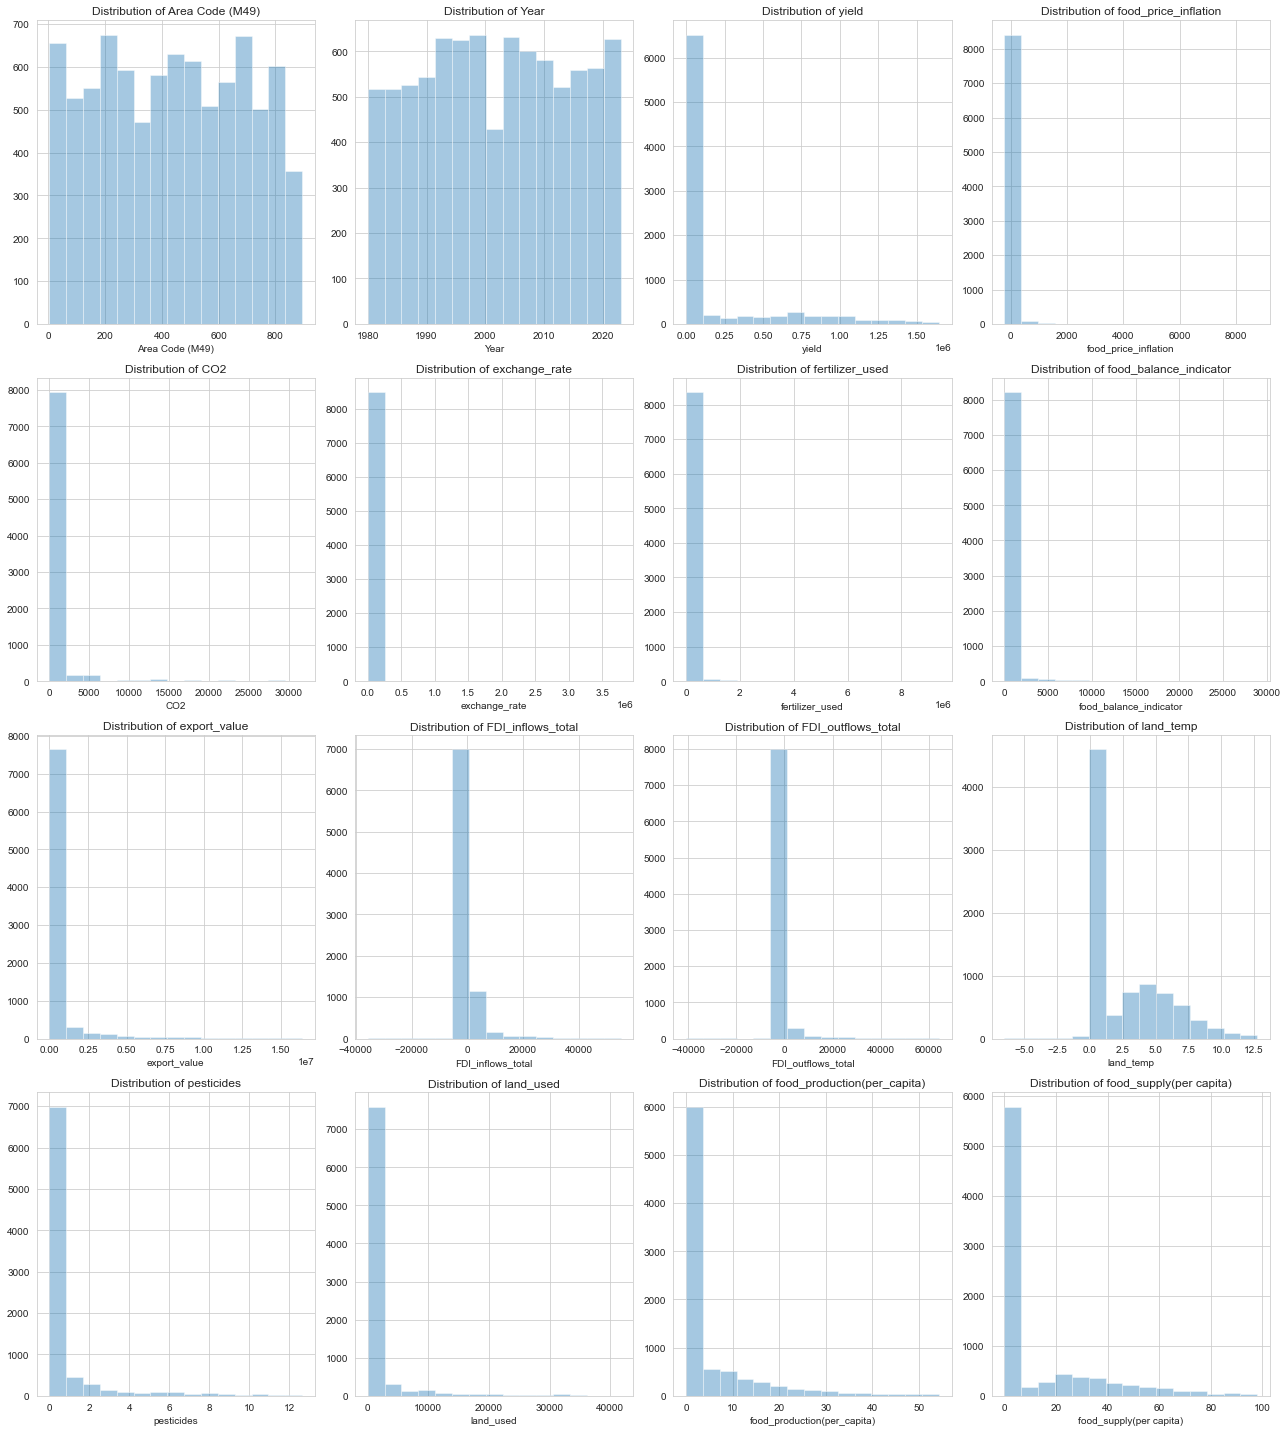

In [239]:
def distplot_df(df, columns):
    num_cols = 4
    num_rows = (len(columns) + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5*num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.distplot(df[col], bins=15, kde=False, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

columns = filtered_df.columns
distplot_df(filtered_df, columns)


## Distribution of Columns

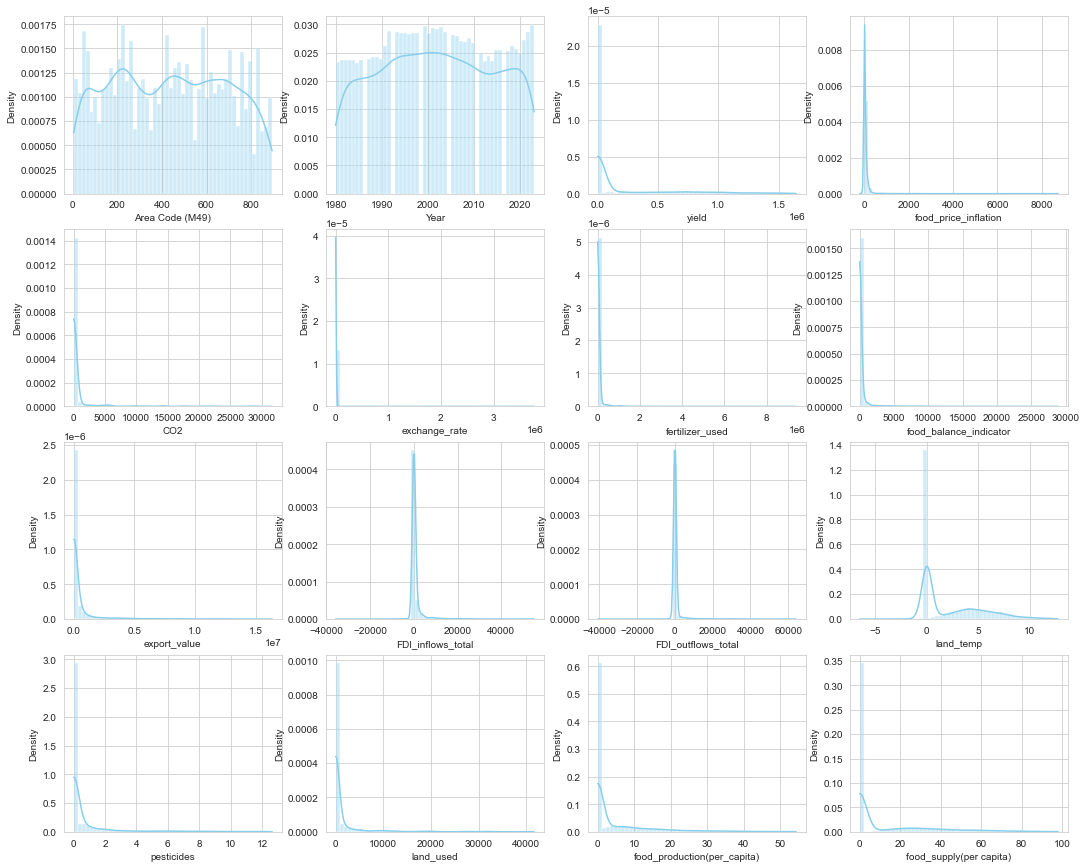

In [240]:
# Looking for Distribution of cols

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat': 'density',
    'bins':n_bins
}
cols=df_filtered_outlier.columns
fig, ax = plt.subplots(4,4, figsize=(18, 15))
ax = ax.flatten()

for i, column in enumerate(cols):
    sns.histplot(
        filtered_df[column], label='Train',
        ax=ax[i], color='skyblue', **histplot_hyperparams
    )

As we can see, from boxplots and ditribution plots, 
It is observed that most of columns are not perfectly normally distributed and most of them are right skewed 
Also most of the columns have outliers



# Implementing log for correcting skeness

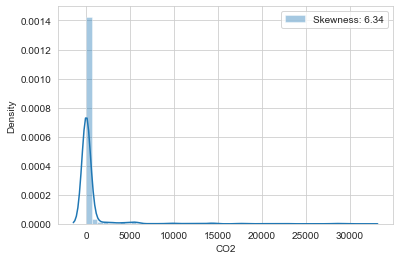

In [241]:
t=sns.distplot(filtered_df["CO2"],label="Skewness: %.2f"%(filtered_df["CO2"].skew()) )
t.legend()

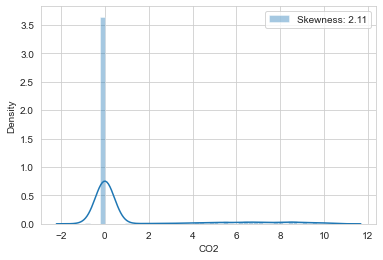

In [242]:
# after log-transform

Log_Ave = filtered_df["CO2"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Ave,label="Skewness: %.2f"%(Log_Ave.skew()) )
t.legend()


here, skewness removed from 6.02 to 1.95

In [243]:
filtered_df_skew2 = filtered_df.copy()

In [244]:
for col in filtered_df.columns:
    if filtered_df[col].dtype == 'float64':
        filtered_df_skew2[col] = filtered_df_skew2[col].map(lambda i: np.log(i) if i > 0 else 0)


In [245]:
filtered_df_skew2.head()

,Area Code (M49),Year,yield,food_price_inflation,CO2,exchange_rate,fertilizer_used,food_balance_indicator,export_value,FDI_inflows_total,FDI_outflows_total,land_temp,pesticides,land_used,food_production(per_capita),food_supply(per capita)
0,4,2000,12.166802,0.000000,0.0,10.765482,0.0,0.0,10.344320,-1.771957,0.0,1.602413,0.0,0.0,0.000000,4.060443
1,4,2001,12.176201,5.032842,0.0,10.768485,0.0,0.0,10.207658,-0.385662,0.0,1.880228,0.0,0.0,2.791165,3.850148
2,4,2002,12.202837,5.389319,0.0,8.289516,0.0,0.0,10.346666,3.912023,0.0,1.920592,0.0,0.0,3.044522,4.262680
3,4,2003,12.246672,5.131241,0.0,3.886967,0.0,0.0,10.770840,4.056989,0.0,1.076707,0.0,0.0,3.034953,4.276666
4,4,2004,12.808277,5.129106,0.0,3.867973,0.0,0.0,10.792058,5.230574,0.0,1.926582,0.0,0.0,2.850707,3.912023


In [246]:
# # Looking for Distribution of cols

# n_bins = 50
# histplot_hyperparams = {
#     'kde':True,
#     'alpha':0.4,
#     'stat': 'density',
#     'bins':n_bins
# }
# cols=['Area Code (M49)', 'Year', 'Yield', 'CO2', 'exchange_rate',
#        'Fertilizer', 'food_balance_export', 'Export_Value',
#        'Total FDI inflows', 'Total FDI outflows', 'temp_change', 'pesticides',
#        'cropland_use']
# fig, ax = plt.subplots(4,4, figsize=(18, 15))
# ax = ax.flatten()

# for i, column in enumerate(cols):
#     sns.histplot(
#         filtered_df_skew[column], label='Train',
#         ax=ax[i], color='blue', **histplot_hyperparams
#     )

For correcting skewness of the data, I will use Log Transform for correcting skewness and for handling outlier I use Z score.


In [247]:
filtered_df_skew2.shape

(8506, 16)

In [248]:
filtered_df_skew2.isnull().sum() # checking null values

Area Code (M49)                0
Year                           0
yield                          0
food_price_inflation           0
CO2                            0
exchange_rate                  0
fertilizer_used                0
food_balance_indicator         0
export_value                   0
FDI_inflows_total              0
FDI_outflows_total             0
land_temp                      0
pesticides                     0
land_used                      0
food_production(per_capita)    0
food_supply(per capita)        0
dtype: int64

# Data Splitting and Normalisation

In [249]:
# Define test years
test_years = [2020, 2021, 2022] #as no data of export value in 2023

test_df = filtered_df_skew2[filtered_df_skew2['Year'].isin(test_years)]

In [250]:
 # Define test years
train_years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,2014,2015, 2016, 2017, 2018,2019]

# Filter the DataFrame for training and testing
train_df = filtered_df_skew2[filtered_df_skew2['Year'].isin(train_years)]

In [251]:
from sklearn.preprocessing import RobustScaler


In [252]:
X = train_df.drop(columns=['export_value'])
y = train_df['export_value']

# Displaying the shapes of the training set
print("Training set shape (X_train, y_train):", X.shape, y.shape)

Training set shape (X_train, y_train): (3910, 15) (3910,)


# Feature Selection using SelectKBest

In [253]:
from sklearn.feature_selection import SelectKBest, f_regression

# Use SelectKBest with f_regression to select the top 10 features based on regression scores
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y)

# Get the scores of each feature
feature_scores = selector.scores_

# Create a DataFrame to store the feature names and their scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Sort the features by their scores in descending order
top_features_df = feature_scores_df.sort_values(by='Score', ascending=False).head(10)

# Print the top 10 features and their scores
print("Top 10 Features:")
print(top_features_df)


Top 10 Features:
                        Feature        Score
14      food_supply(per capita)  6347.515248
2                         yield  4818.435786
8             FDI_inflows_total  4063.243950
13  food_production(per_capita)  3709.037643
7        food_balance_indicator  1293.466630
9            FDI_outflows_total  1214.400056
12                    land_used   963.801221
4                           CO2   871.949158
3          food_price_inflation   820.053137
5                 exchange_rate   745.247003


In [254]:
X.columns

Index(['Area Code (M49)', 'Year', 'yield', 'food_price_inflation', 'CO2',
       'exchange_rate', 'fertilizer_used', 'food_balance_indicator',
       'FDI_inflows_total', 'FDI_outflows_total', 'land_temp', 'pesticides',
       'land_used', 'food_production(per_capita)', 'food_supply(per capita)'],
      dtype='object')

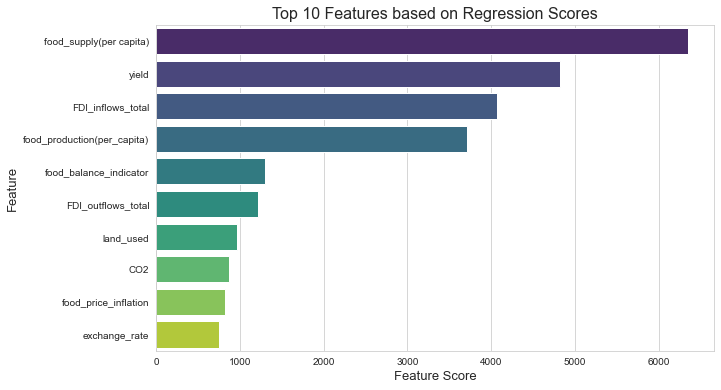

In [255]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=top_features_df, palette='viridis')
plt.xlabel('Feature Score', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.title('Top 10 Features based on Regression Scores', fontsize=16)
plt.show()

In [256]:
# X = X[['Area Code (M49)', 'Year', 'food_supply(per capita)', 'food_production(per_capita)', 'yield', 'food_balance_indicator', 'FDI_inflows_total',
#        'FDI_outflows_total', 'land_temp', 'land_used']]
X = X[['Area Code (M49)', 'Year','food_supply(per capita)', 'food_production(per_capita)', 'yield', 'food_balance_indicator', 'FDI_inflows_total',
       'FDI_outflows_total', 'land_used']] #not taking land_temp, exchange_rate, CO2, land_used

In [257]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training and validation data into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Display the shapes of the training, validation, and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (2346, 9) (2346,)
Validation set shape (X_val, y_val): (782, 9) (782,)
Testing set shape (X_test, y_test): (782, 9) (782,)


# Data Scaling using RobustScaler

In [258]:
from sklearn.preprocessing import RobustScaler

# Initialize the StandardScaler

scaler = RobustScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and testing data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training, validation, and testing sets
print("Scaled Training set shape (X_train_scaled):", X_train_scaled.shape)
print("Scaled Validation set shape (X_val_scaled):", X_val_scaled.shape)
print("Scaled Testing set shape (X_test_scaled):", X_test_scaled.shape)

Scaled Training set shape (X_train_scaled): (2346, 9)
Scaled Validation set shape (X_val_scaled): (782, 9)
Scaled Testing set shape (X_test_scaled): (782, 9)


# Dimensionality Reduction using PCA

In [259]:
from sklearn.decomposition import PCA


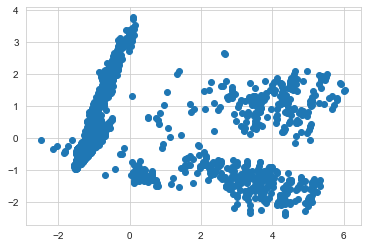

In [260]:
#Checking to see if dataset is linearly separable or not
pca = PCA(n_components=2)
X_2PCA_plot = pca.fit_transform(X_train_scaled)
plt.scatter(X_2PCA_plot[:,0], X_2PCA_plot[:,1])
plt.show()

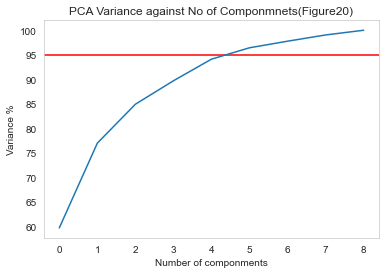

In [261]:
pca = PCA()
pca.fit_transform(X_train_scaled)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against No of Componmnets(Figure20)")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(95, color="red")

plt.plot(var1)
plt.grid()

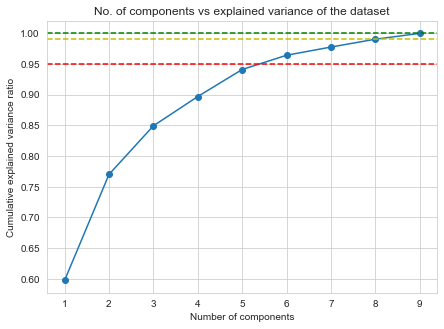

In [262]:
# Perform PCA to reduce the dimensionality of the dataset
pca = PCA()
pca.fit(X_train_scaled)

# Calculate the cumulative explained variance ratio
exp_variance_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(exp_variance_cumsum)+1), exp_variance_cumsum, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axhline(y=0.99, color='y', linestyle='--')
plt.axhline(y=1, color='g', linestyle='--')
plt.xticks(range(1, len(exp_variance_cumsum)+1))
plt.title('No. of components vs explained variance of the dataset')
plt.show()

In [263]:
pca=PCA(n_components=6)
X_train_pca=pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [264]:
X_train_pca.shape

(2346, 6)

In [265]:
X_val_pca.shape

(782, 6)

In [266]:
X_test_pca.shape

(782, 6)

# Creating MLP Model

In [267]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.preprocessing import RobustScaler

In [268]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)


In [269]:
X_train_tensor_pca = torch.tensor(X_train_pca, dtype=torch.float32)
X_val_tensor_pca = torch.tensor(X_val_pca, dtype=torch.float32)
X_test_tensor_pca = torch.tensor(X_test_pca, dtype=torch.float32)

In [270]:
X_train_tensor_pca.shape


torch.Size([2346, 6])

In [271]:
X_val_tensor_pca.shape

torch.Size([782, 6])

In [272]:
X_test_tensor_pca.shape

torch.Size([782, 6])

In [305]:
# Creating DataLoader for training data
train_dataset = TensorDataset(X_train_tensor_pca, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

#building MLP model class
class MLP_Model(nn.Module):
    def __init__(self, input_size):
        super(MLP_Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 60)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(60, 150)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(150, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        return x


In [274]:
# Initialize the model
model = MLP_Model(input_size=X_train_pca.shape[1])

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate reduction scheduler
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.2, patience=5, min_lr=0.0001)

# Training loop
for epoch in range(100):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()

    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_tensor_pca)
        mse_val = criterion(y_val_pred, y_val_tensor.unsqueeze(1))
        scheduler.step(mse_val)

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/100], Validation Loss: {mse_val.item():.4f}')

# Predict on the test set
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor_pca)

# Convert predictions and targets to NumPy arrays
y_test_pred_np = y_test_pred.numpy().flatten()
y_test_np = y_test.values.flatten()

# Evaluate the model using Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(y_test_np, y_test_pred_np)
print("Mean Squared Error on Test Set:", mse_test)

Epoch [5/100], Validation Loss: 35.4035
Epoch [10/100], Validation Loss: 10.0500
Epoch [15/100], Validation Loss: 6.3860
Epoch [20/100], Validation Loss: 5.6967
Epoch [25/100], Validation Loss: 5.4894
Epoch [30/100], Validation Loss: 5.4051
Epoch [35/100], Validation Loss: 5.2400
Epoch [40/100], Validation Loss: 5.1339
Epoch [45/100], Validation Loss: 5.0375
Epoch [50/100], Validation Loss: 4.9713
Epoch [55/100], Validation Loss: 4.8978
Epoch [60/100], Validation Loss: 4.7634
Epoch [65/100], Validation Loss: 4.6402
Epoch [70/100], Validation Loss: 4.5505
Epoch [75/100], Validation Loss: 4.4817
Epoch [80/100], Validation Loss: 4.4505
Epoch [85/100], Validation Loss: 4.4036
Epoch [90/100], Validation Loss: 4.3673
Epoch [95/100], Validation Loss: 4.2650
Epoch [100/100], Validation Loss: 4.2627
Mean Squared Error on Test Set: 4.089305287404545


Epoch [5/100], Validation Loss: 4.2520
Epoch [10/100], Validation Loss: 4.1866
Epoch [15/100], Validation Loss: 4.1247
Epoch [20/100], Validation Loss: 4.1658
Epoch [25/100], Validation Loss: 4.0941
Epoch [30/100], Validation Loss: 4.0198
Epoch [35/100], Validation Loss: 4.0512
Epoch [40/100], Validation Loss: 4.1246
Epoch [45/100], Validation Loss: 4.0086
Epoch [50/100], Validation Loss: 3.9827
Epoch [55/100], Validation Loss: 3.9712
Epoch [60/100], Validation Loss: 3.9955
Epoch [65/100], Validation Loss: 3.9773
Epoch [70/100], Validation Loss: 3.9822
Epoch [75/100], Validation Loss: 3.9491
Epoch [80/100], Validation Loss: 3.9677
Epoch [85/100], Validation Loss: 3.9892
Epoch [90/100], Validation Loss: 3.9485
Epoch [95/100], Validation Loss: 3.9608
Epoch [100/100], Validation Loss: 3.9247


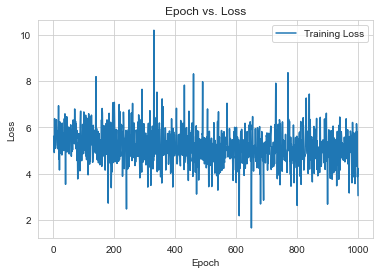

In [321]:
train_losses = []

# Training loop
for epoch in range(100):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        
        # Append the training loss to the list
        train_losses.append(loss.item())

    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_tensor_pca)
        mse_val = criterion(y_val_pred, y_val_tensor.unsqueeze(1))
        scheduler.step(mse_val)

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/100], Validation Loss: {mse_val.item():.4f}')

# Plot epoch vs. training loss
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.legend()
plt.show()


In [317]:
from sklearn.metrics import r2_score

# Evaluating the model using Mean Squared Error (MSE) on the test set
print("Mean Squared Error on Test Set:", mse_test)

mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse_val)

# Converting predictions and targets to NumPy arrays
y_val_pred_np = y_val_pred.numpy().flatten()
y_val_np = y_val.values.flatten()

# Calculating R^2 score
r2 = r2_score(y_test_np, y_test_pred_np)
print("R^2 Score on Test Set:", r2)

# Calculating R^2 score on the validation set
r2_val = r2_score(y_val_np, y_val_pred_np)
print("R^2 Score on Validation Set:", r2_val)

Mean Squared Error on Test Set: 4.089305287404545
Mean Squared Error on Validation Set: 4.2626511456298894
R^2 Score on Test Set: 0.8683023543832229
R^2 Score on Validation Set: 0.8706884203848051


In [276]:
# Add the year and area code to the predictions
test_df_with_predictions = X_test.copy()
test_df_with_predictions['Predicted Value (USD)'] = y_test_pred.squeeze().tolist()
test_df_with_predictions['Actual Value (USD)'] = y_test

# Add the year and area code to the predictions
test_df_with_predictions = train_df[['Year', 'Area Code (M49)']].merge(test_df_with_predictions, left_index=True, right_index=True)

In [277]:
test_df_with_predictions.head()

,Year_x,Area Code (M49)_x,Area Code (M49)_y,Year_y,food_supply(per capita),food_production(per_capita),yield,food_balance_indicator,FDI_inflows_total,FDI_outflows_total,land_used,Predicted Value (USD),Actual Value (USD)
0,2000,4,4,2000,4.060443,0.000000,12.166802,0.000000,-1.771957,0.0,0.000000,7.814718,10.344320
6,2006,4,4,2006,3.784190,2.667228,12.727628,0.000000,5.472271,0.0,8.975883,12.417294,10.939071
8,2008,4,4,2008,3.332205,2.140066,11.948299,0.000000,3.829375,0.0,0.000000,9.216303,11.991213
12,2012,4,4,2012,4.060443,2.251292,12.750723,5.288267,3.710248,0.0,0.000000,11.159376,11.774720
14,2014,4,4,2014,3.970292,2.151762,12.802858,6.021023,3.760625,0.0,8.975883,12.684115,12.566183


In [278]:
test_df_with_predictions_grouped_actual = test_df_with_predictions.groupby('Year_x')['Actual Value (USD)'].sum().reset_index()
test_df_with_predictions_grouped_predicted = test_df_with_predictions.groupby('Year_x')['Predicted Value (USD)'].sum().reset_index()

In [279]:
test_df2 = test_df[['Area Code (M49)', 'Year','food_supply(per capita)', 'food_production(per_capita)', 'yield', 'food_balance_indicator', 'FDI_inflows_total',
       'FDI_outflows_total', 'land_used']]

In [280]:
test_df2.head()

,Area Code (M49),Year,food_supply(per capita),food_production(per_capita),yield,food_balance_indicator,FDI_inflows_total,FDI_outflows_total,land_used
20,4,2020,3.465736,2.151762,13.328061,6.799056,2.562650,3.617074,0.000000
21,4,2021,3.433987,0.000000,12.948498,7.305860,3.025338,3.427221,0.000000
22,4,2022,0.000000,0.000000,12.987714,0.000000,0.000000,0.000000,0.000000
43,8,2020,2.564949,2.001480,14.262294,5.111988,6.975284,4.471942,6.533142
44,8,2021,2.564949,0.000000,14.268835,5.209486,7.111188,4.144521,6.533105


In [281]:
# Prepare the test_df by dropping the 'Export Value (USD)' column
X_test_df = test_df2.copy()

In [282]:
X_test_df.head()

,Area Code (M49),Year,food_supply(per capita),food_production(per_capita),yield,food_balance_indicator,FDI_inflows_total,FDI_outflows_total,land_used
20,4,2020,3.465736,2.151762,13.328061,6.799056,2.562650,3.617074,0.000000
21,4,2021,3.433987,0.000000,12.948498,7.305860,3.025338,3.427221,0.000000
22,4,2022,0.000000,0.000000,12.987714,0.000000,0.000000,0.000000,0.000000
43,8,2020,2.564949,2.001480,14.262294,5.111988,6.975284,4.471942,6.533142
44,8,2021,2.564949,0.000000,14.268835,5.209486,7.111188,4.144521,6.533105


In [283]:
X_test_df_scaled = scaler.transform(X_test_df)

In [284]:
X_test_df_scaled.shape

(592, 9)

In [285]:
# Define and fit PCA on the training data
pca = PCA(n_components=6)
X_test_df_scaled_pca = pca.fit_transform(X_test_df_scaled)

# # Transform the test data using the fitted PCA instance
# X_test_df_scaled_pca = pca.transform(X_test_df_scaled)

In [286]:
X_test_df_scaled_pca.shape

(592, 6)

In [287]:
X_test_df_scaled_pca = torch.tensor(X_test_df_scaled_pca, dtype=torch.float32)


In [288]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_df_scaled_pca)

In [289]:
test_df_pred = X_test_df.copy()
test_df_pred['Predicted Value (USD)'] = test_predictions.squeeze().tolist()
test_df_pred['Actual Value (USD)'] = test_df['export_value'].values

In [290]:
test_df_pred.head(10)

,Area Code (M49),Year,food_supply(per capita),food_production(per_capita),yield,food_balance_indicator,FDI_inflows_total,FDI_outflows_total,land_used,Predicted Value (USD),Actual Value (USD)
20,4,2020,3.465736,2.151762,13.328061,6.799056,2.562650,3.617074,0.000000,8.787487,13.453783
21,4,2021,3.433987,0.000000,12.948498,7.305860,3.025338,3.427221,0.000000,7.826019,13.494983
22,4,2022,0.000000,0.000000,12.987714,0.000000,0.000000,0.000000,0.000000,8.616978,13.202831
43,8,2020,2.564949,2.001480,14.262294,5.111988,6.975284,4.471942,6.533142,12.933577,11.644769
44,8,2021,2.564949,0.000000,14.268835,5.209486,7.111188,4.144521,6.533105,12.779428,11.641084
45,8,2022,0.000000,0.000000,14.298386,0.000000,7.268311,5.095437,0.000000,4.348722,12.004654
66,12,2020,3.737670,2.014903,13.794938,6.769642,7.041097,2.685819,0.000000,8.246659,13.117803
67,12,2021,3.806662,0.000000,13.786243,6.637258,6.768098,0.000000,0.000000,9.284666,13.189552
88,24,2020,3.295837,0.993252,12.271078,3.931826,0.000000,4.505510,0.000000,6.702333,9.904791
89,24,2021,2.079442,0.000000,12.267083,3.850148,0.000000,0.000000,0.000000,9.406981,9.710446


In [291]:
selected_col=test_df_pred[['Area Code (M49)','Year','Predicted Value (USD)','Actual Value (USD)']]

In [292]:
selected_col.head()

,Area Code (M49),Year,Predicted Value (USD),Actual Value (USD)
20,4,2020,8.787487,13.453783
21,4,2021,7.826019,13.494983
22,4,2022,8.616978,13.202831
43,8,2020,12.933577,11.644769
44,8,2021,12.779428,11.641084


In [293]:
#reversing log transformation
for col in selected_col.columns:
    if col not in ['Year', 'Area Code (M49)']:  #excluding categorical cols
        selected_columns1[col] = np.exp(selected_col[col])


In [294]:
selected_col.shape

(592, 4)

In [295]:
df_land_use['Area Code (M49)'].nunique() # has most Area Code (M49)
df_land_use = df_land_use[['Area Code (M49)', 'Area']]

In [296]:
df_land_use.drop_duplicates()

,Area Code (M49),Area
0,4,Afghanistan
490,8,Albania
974,12,Algeria
1473,16,American Samoa
1872,20,Andorra
...,...,...
96207,732,Western Sahara
96564,887,Yemen
97005,890,Yugoslav SFR
97113,894,Zambia


In [297]:
df_output = pd.merge(selected_col, df_land_use, on = 'Area Code (M49)')

In [298]:
df_output = df_output[['Area', 'Year', 'Predicted Value (USD)', 'Actual Value (USD)']]

In [299]:
df_output = df_output.drop_duplicates()

In [300]:
def merge_area_code_area(row):
    return f"{row['Area']}-{row['Year']}"

# Apply the function to create the 'index' column
df_output['Index'] = df_output.apply(merge_area_code_area, axis=1)

In [301]:
df_output.head()

,Area,Year,Predicted Value (USD),Actual Value (USD),Index
0,Afghanistan,2020,6551.747127,696471.98,Afghanistan-2020
490,Afghanistan,2021,2504.938061,725765.72,Afghanistan-2021
980,Afghanistan,2022,5524.663898,541896.88,Afghanistan-2022
1470,Albania,2020,413981.507470,114093.03,Albania-2020
1954,Albania,2021,354841.868503,113673.36,Albania-2021


In [302]:
df_output = df_output[['Index', 'Actual Value (USD)', 'Predicted Value (USD)']]

In [303]:
df_output.head()

,Index,Actual Value (USD),Predicted Value (USD)
0,Afghanistan-2020,696471.98,6551.747127
490,Afghanistan-2021,725765.72,2504.938061
980,Afghanistan-2022,541896.88,5524.663898
1470,Albania-2020,114093.03,413981.507470
1954,Albania-2021,113673.36,354841.868503


In [304]:
df_output.to_csv('output.csv', index = False)